#QF


#DATA CLEANING

In [315]:
import pandas as pd

In [316]:
import pandas as pd
df1=pd.read_excel("/content/QF1Nov22-1Sep23.xlsx")
df1=df1.drop_duplicates()
# duplicates should be dropped

In [317]:
df1=df1.drop_duplicates()

In [318]:
df1.shape
df1

,dt,Values
0,2023-01-01 00:00:00,838.78
1,2023-01-01 01:00:00,826.00
2,2023-01-01 02:00:00,854.66
3,2023-01-01 03:00:00,810.64
4,2023-01-01 04:00:00,862.42
...,...,...
5826,2023-08-31 19:00:00,891.08
5827,2023-08-31 20:00:00,851.86
5828,2023-08-31 21:00:00,791.14
5829,2023-08-31 22:00:00,724.82


In [319]:
import pandas as pd
df2=pd.read_csv("/content/QFl20_21.csv")
df2=df2.drop_duplicates()
# duplicates should be dropped

In [320]:
df2=df2.drop_duplicates()

In [321]:
df2.shape
df2

,Date;Value;Measurement
0,31-12-2020 01:00;485.48;KWH
1,31-12-2020 02:00;509.96;KWH
2,31-12-2020 03:00;490.22;KWH
3,31-12-2020 04:00;491.96;KWH
4,31-12-2020 05:00;492.82;KWH
...,...
8779,31-12-2021 20:00;580.42;KWH
8780,31-12-2021 21:00;589.16;KWH
8781,31-12-2021 22:00;596.46;KWH
8782,31-12-2021 23:00;595.08;KWH


In [322]:
df2[['Date', 'Value', 'Measurement']] = df2['Date;Value;Measurement'].str.split(';', expand=True)

# Splitting the 'Date' column into 'Date' and 'Time'
df2[['Date', 'Time']] = df2['Date'].str.split(' ', expand=True)

# Extracting year and month
df2['Year'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y').dt.year
df2['Month'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y').dt.month
df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')
# Extract day
df2['Day'] = df2['Date'].dt.day
df2[['Hour','Minutes']] = df2['Time'].str.split(':', expand=True)
df2

,Date;Value;Measurement,Date,Value,Measurement,Time,Year,Month,Day,Hour,Minutes
0,31-12-2020 01:00;485.48;KWH,2020-12-31,485.48,KWH,01:00,2020,12,31,01,00
1,31-12-2020 02:00;509.96;KWH,2020-12-31,509.96,KWH,02:00,2020,12,31,02,00
2,31-12-2020 03:00;490.22;KWH,2020-12-31,490.22,KWH,03:00,2020,12,31,03,00
3,31-12-2020 04:00;491.96;KWH,2020-12-31,491.96,KWH,04:00,2020,12,31,04,00
4,31-12-2020 05:00;492.82;KWH,2020-12-31,492.82,KWH,05:00,2020,12,31,05,00
...,...,...,...,...,...,...,...,...,...,...
8779,31-12-2021 20:00;580.42;KWH,2021-12-31,580.42,KWH,20:00,2021,12,31,20,00
8780,31-12-2021 21:00;589.16;KWH,2021-12-31,589.16,KWH,21:00,2021,12,31,21,00
8781,31-12-2021 22:00;596.46;KWH,2021-12-31,596.46,KWH,22:00,2021,12,31,22,00
8782,31-12-2021 23:00;595.08;KWH,2021-12-31,595.08,KWH,23:00,2021,12,31,23,00


In [323]:
df2=df2.drop(columns="Date;Value;Measurement")
df2=df2.drop(columns="Minutes")
df2=df2.drop(columns="Time")
df2=df2.drop(columns="Date")

In [324]:
KWH_count=(df2['Measurement']=='KWH').sum()
KWH_count
df2=df2.drop(columns="Measurement")

In [325]:
df2['Value'] = pd.to_numeric(df2['Value'])
df2['Value'] *= 1000
df2

,Value,Year,Month,Day,Hour
0,485480.0,2020,12,31,01
1,509960.0,2020,12,31,02
2,490220.0,2020,12,31,03
3,491960.0,2020,12,31,04
4,492820.0,2020,12,31,05
...,...,...,...,...,...
8779,580420.0,2021,12,31,20
8780,589160.0,2021,12,31,21
8781,596460.0,2021,12,31,22
8782,595080.0,2021,12,31,23


ADDING THE BOTH DATAFRAME

In [326]:
#Splitting the column
df1['year'] = df1['dt'].dt.year
df1['month'] = df1['dt'].dt.month
df1['day'] = df1['dt'].dt.day
df1['time'] = df1['dt'].dt.time
df1['minutes']=df1['dt'].dt.minute
df1['seconds']=df1['dt'].dt.second
df1['hours']=df1['dt'].dt.hour
zeros_minute_count=(df1['minutes']==0).sum()
print(zeros_minute_count)
zeros_second_count=(df1['seconds']==0).sum()
print(zeros_second_count)
zeros_hour_count=(df1['hours']==0).sum()
print(zeros_hour_count)
df1

5831
5831
243


,dt,Values,year,month,day,time,minutes,seconds,hours
0,2023-01-01 00:00:00,838.78,2023,1,1,00:00:00,0,0,0
1,2023-01-01 01:00:00,826.00,2023,1,1,01:00:00,0,0,1
2,2023-01-01 02:00:00,854.66,2023,1,1,02:00:00,0,0,2
3,2023-01-01 03:00:00,810.64,2023,1,1,03:00:00,0,0,3
4,2023-01-01 04:00:00,862.42,2023,1,1,04:00:00,0,0,4
...,...,...,...,...,...,...,...,...,...
5826,2023-08-31 19:00:00,891.08,2023,8,31,19:00:00,0,0,19
5827,2023-08-31 20:00:00,851.86,2023,8,31,20:00:00,0,0,20
5828,2023-08-31 21:00:00,791.14,2023,8,31,21:00:00,0,0,21
5829,2023-08-31 22:00:00,724.82,2023,8,31,22:00:00,0,0,22


In [327]:
df1=df1.drop(columns="minutes")
df1=df1.drop(columns="seconds")
df1=df1.drop(columns="time")
df1=df1.drop(columns="dt")
df2=df2.rename(columns={'Value' :'values' })
df2=df2.rename(columns={'Year' :'year' })
df2=df2.rename(columns={'Month' :'month' })
df2=df2.rename(columns={'Day' :'day' })
df2=df2.rename(columns={'Hour' :'hours' })
df1
df1=df1.rename(columns={'Values' :'values' })
df1['values']=df1['values']*1000

In [328]:
df2

,values,year,month,day,hours
0,485480.0,2020,12,31,01
1,509960.0,2020,12,31,02
2,490220.0,2020,12,31,03
3,491960.0,2020,12,31,04
4,492820.0,2020,12,31,05
...,...,...,...,...,...
8779,580420.0,2021,12,31,20
8780,589160.0,2021,12,31,21
8781,596460.0,2021,12,31,22
8782,595080.0,2021,12,31,23


In [329]:
df = pd.concat([df2, df1])
df

,values,year,month,day,hours
0,485480.0,2020,12,31,01
1,509960.0,2020,12,31,02
2,490220.0,2020,12,31,03
3,491960.0,2020,12,31,04
4,492820.0,2020,12,31,05
...,...,...,...,...,...
5826,891080.0,2023,8,31,19
5827,851860.0,2023,8,31,20
5828,791140.0,2023,8,31,21
5829,724820.0,2023,8,31,22


# PER DAY ANALYSIS

In [330]:
Hourly_average_consumption = df.groupby(['year', 'month', 'day'])['values'].mean()
Hourly_average_consumption_df = Hourly_average_consumption.reset_index()
Hourly_average_consumption_df = Hourly_average_consumption_df.rename(columns={'values': 'Hourly_average_consumption'})
Hourly_average_consumption_df

,year,month,day,Hourly_average_consumption
0,2020,12,31,5.059757e+05
1,2021,1,1,5.153342e+05
2,2021,1,2,5.253933e+05
3,2021,1,3,5.399717e+05
4,2021,1,4,5.475833e+05
...,...,...,...,...
605,2023,8,27,1.300975e+06
606,2023,8,28,8.987067e+05
607,2023,8,29,8.104558e+05
608,2023,8,30,8.534858e+05


In [331]:
Hourly_maximum_consumption= df.groupby(['year','month','day'])['values'].max()
Hourly_maximum_consumption_df=Hourly_maximum_consumption.reset_index()
Hourly_maximum_consumption_df=Hourly_maximum_consumption_df.rename(columns={'values' :'Hourly_maximum_consumption' })
Hourly_maximum_consumption_df

,year,month,day,Hourly_maximum_consumption
0,2020,12,31,524760.0
1,2021,1,1,531000.0
2,2021,1,2,534580.0
3,2021,1,3,559660.0
4,2021,1,4,563960.0
...,...,...,...,...
605,2023,8,27,1383520.0
606,2023,8,28,1253040.0
607,2023,8,29,834040.0
608,2023,8,30,991420.0


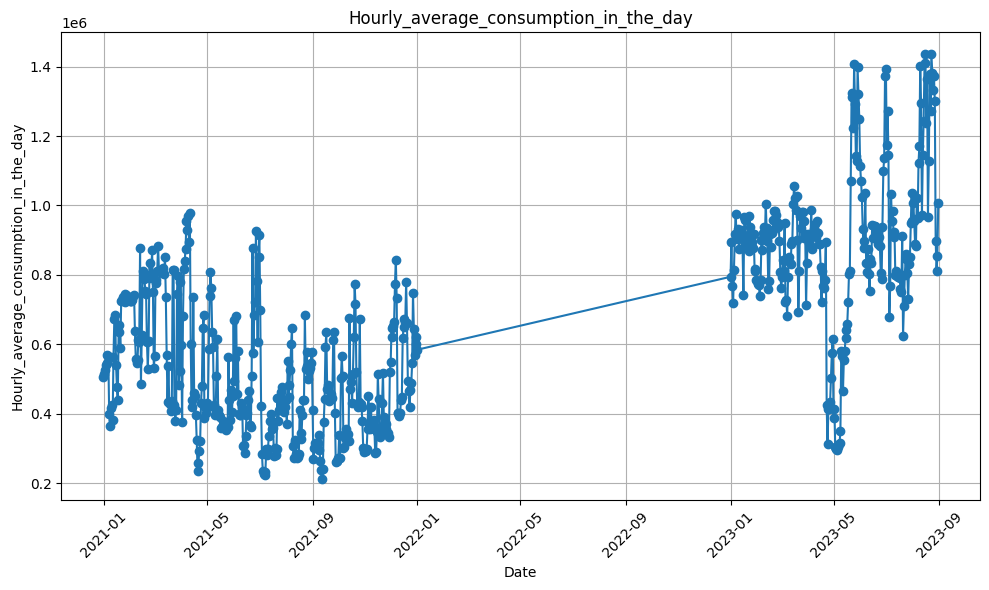

In [332]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_average_consumption_df['date'] = pd.to_datetime(Hourly_average_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_average_consumption_df['date'], Hourly_average_consumption_df['Hourly_average_consumption'], marker='o', linestyle='-')
plt.title('Hourly_average_consumption_in_the_day')
plt.xlabel('Date')
plt.ylabel('Hourly_average_consumption_in_the_day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

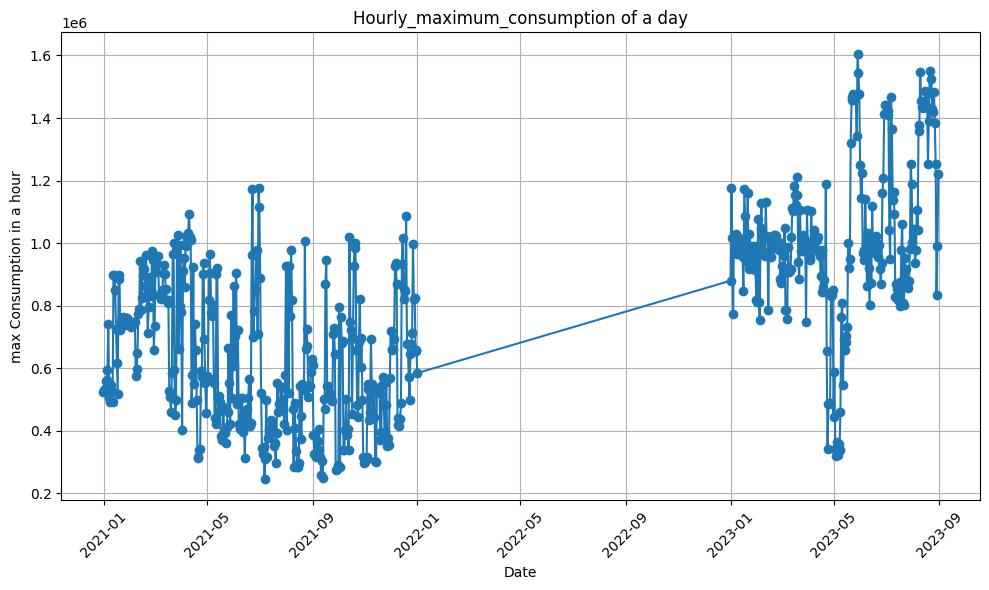

In [333]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Hourly_maximum_consumption_df['date'] = pd.to_datetime(Hourly_maximum_consumption_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Hourly_maximum_consumption_df['date'], Hourly_maximum_consumption_df['Hourly_maximum_consumption'], marker='o', linestyle='-')
plt.title('Hourly_maximum_consumption of a day')
plt.xlabel('Date')
plt.ylabel('max Consumption in a hour')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [334]:
daily_sum= df.groupby(['year','month','day'])['values'].sum()
daily_sum_df=daily_sum.reset_index()
daily_sum_df=daily_sum_df.rename(columns={'values' :'total of the day' })
daily_sum_df

,year,month,day,total of the day
0,2020,12,31,11637440.0
1,2021,1,1,12368020.0
2,2021,1,2,12609440.0
3,2021,1,3,12959320.0
4,2021,1,4,13142000.0
...,...,...,...,...
605,2023,8,27,31223400.0
606,2023,8,28,21568960.0
607,2023,8,29,19450940.0
608,2023,8,30,20483660.0


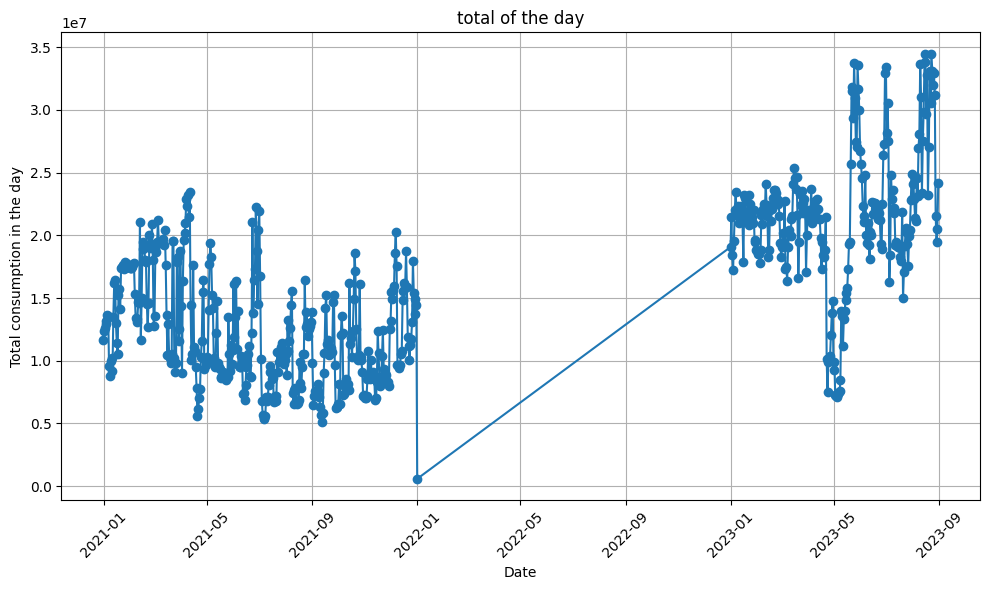

In [335]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
daily_sum_df['date'] = pd.to_datetime(daily_sum_df[['year', 'month', 'day']])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(daily_sum_df['date'], daily_sum_df['total of the day'], marker='o', linestyle='-')
plt.title('total of the day')
plt.xlabel('Date')
plt.ylabel('Total consumption in the day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#PER MONTH ANALYSIS

In [336]:
Daily_average_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].mean()
Daily_average_consumption_df=Daily_average_consumption.reset_index()
Daily_average_consumption_df=Daily_average_consumption_df.rename(columns={'total of the day':'Daily_average_consumption'})
Daily_average_consumption_df

,year,month,Daily_average_consumption
0,2020,12,1.163744e+07
1,2021,1,1.437187e+07
2,2021,2,1.662106e+07
3,2021,3,1.585522e+07
4,2021,4,1.384104e+07
5,2021,5,1.121604e+07
6,2021,6,1.255372e+07
7,2021,7,9.109296e+06
8,2021,8,1.067000e+07
9,2021,9,9.189760e+06


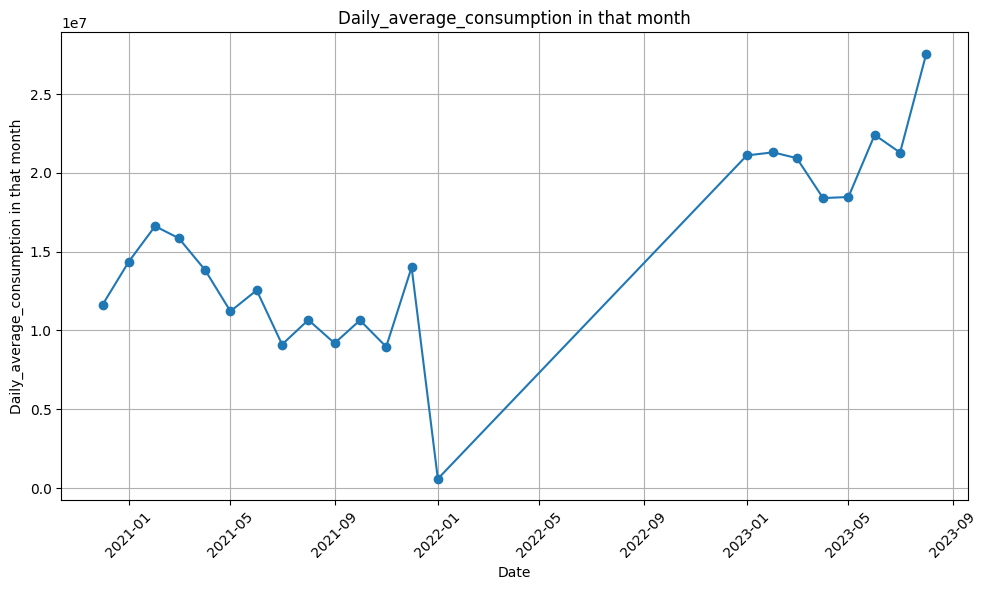

In [337]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_average_consumption_df['date'] = pd.to_datetime({'year': Daily_average_consumption_df['year'], 'month': Daily_average_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_average_consumption_df['date'], Daily_average_consumption_df['Daily_average_consumption'], marker='o', linestyle='-')
plt.title('Daily_average_consumption in that month')
plt.xlabel('Date')
plt.ylabel('Daily_average_consumption in that month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [338]:
monthly_total = daily_sum_df.groupby(['year', 'month'])['total of the day'].sum()
monthly_total_df=monthly_total.reset_index()
monthly_total_df=monthly_total_df.rename(columns={'total of the day':'monthly_total'})
monthly_total_df

,year,month,monthly_total
0,2020,12,11637440.0
1,2021,1,445527840.0
2,2021,2,465389560.0
3,2021,3,491511960.0
4,2021,4,415231060.0
5,2021,5,347697340.0
6,2021,6,376611600.0
7,2021,7,282388180.0
8,2021,8,330769940.0
9,2021,9,275692800.0


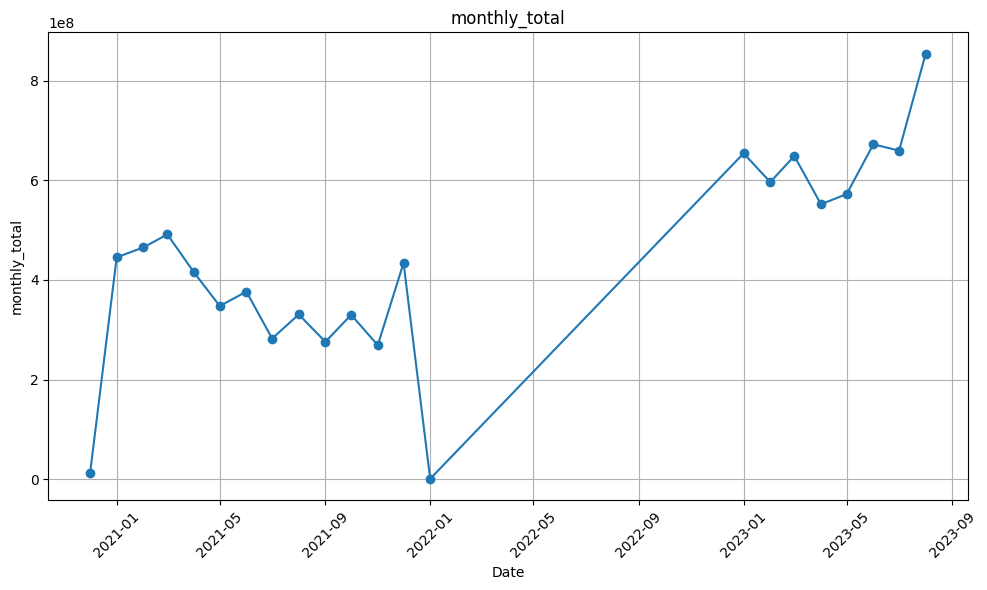

In [339]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
monthly_total_df['date'] = pd.to_datetime({'year': monthly_total_df['year'], 'month': monthly_total_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_total_df['date'], monthly_total_df['monthly_total'], marker='o', linestyle='-')
plt.title('monthly_total')
plt.xlabel('Date')
plt.ylabel('monthly_total')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [340]:
Daily_maximum_consumption = daily_sum_df.groupby(['year', 'month'])['total of the day'].max()
Daily_maximum_consumption_df=Daily_maximum_consumption.reset_index()
Daily_maximum_consumption_df=Daily_maximum_consumption_df.rename(columns={'total of the day':'maximum in any day'})
Daily_maximum_consumption_df

,year,month,maximum in any day
0,2020,12,11637440.0
1,2021,1,17888460.0
2,2021,2,21028080.0
3,2021,3,21223260.0
4,2021,4,23470080.0
5,2021,5,19377120.0
6,2021,6,22266140.0
7,2021,7,21964440.0
8,2021,8,16408540.0
9,2021,9,15254920.0


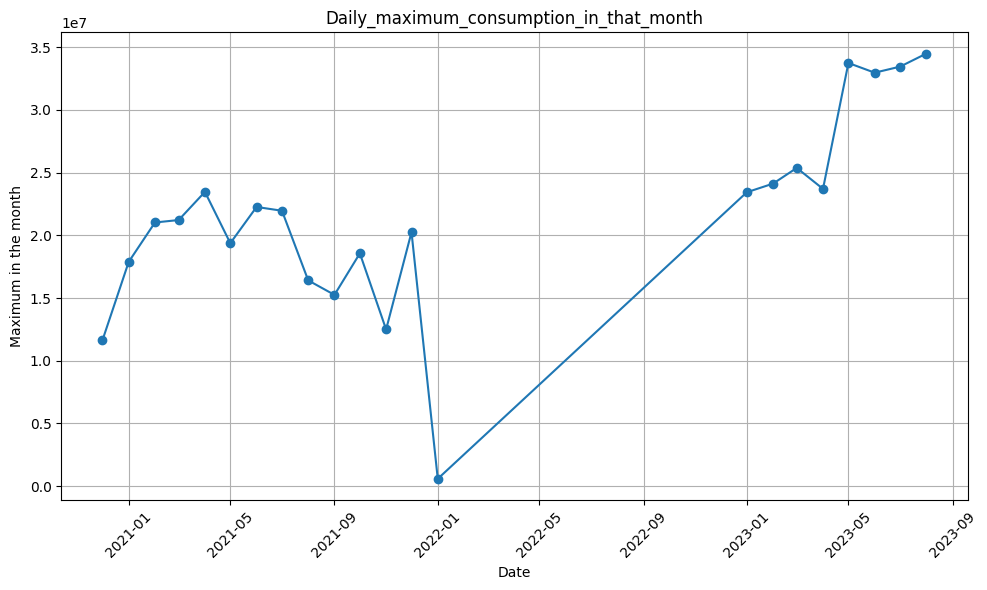

In [341]:
import matplotlib.pyplot as plt

# Assuming you have daily_average_df DataFrame

# Convert 'year', 'month', and 'day' columns to datetime format
Daily_maximum_consumption_df['date'] = pd.to_datetime({'year': Daily_maximum_consumption_df['year'], 'month': Daily_maximum_consumption_df['month'], 'day': 1})


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(Daily_maximum_consumption_df['date'], Daily_maximum_consumption_df['maximum in any day'], marker='o', linestyle='-')
plt.title('Daily_maximum_consumption_in_that_month')
plt.xlabel('Date')
plt.ylabel('Maximum in the month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Yearly anaysis

In [342]:
Monthly_average_consumption = monthly_total_df.groupby(['year'])['monthly_total'].mean()

In [343]:
Monthly_average_consumption

year
2020     11637440.0
2021    372008285.0
2022       584580.0
2023    651492620.0
Name: monthly_total, dtype: float64

In [344]:
mean_daily_consumption = daily_sum_df['total of the day'].mean()
print(mean_daily_consumption)

15882397.37704918


In [345]:
mean_monthly_consumption=monthly_total_df['monthly_total'].mean()
print(mean_monthly_consumption)

440375563.6363636
